<a href="https://colab.research.google.com/github/luca-arts/seeingtheimperceptible/blob/main/notebooks/creative/tests/stable_diff_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# stable diffusion basic approach

**Important** make sure GPU is enabled: toolbar -> Runtime -> Change Runtime Type -> GPU

In [25]:
!nvidia-smi

Wed Oct 12 15:23:14 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    38W / 300W |  13249MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
!pip install --upgrade diffusers transformers scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 229 kB 14.3 MB/s 
     |████████████████████████████████| 5.3 MB 63.5 MB/s 
     |████████████████████████████████| 163 kB 71.7 MB/s 
     |████████████████████████████████| 7.6 MB 46.9 MB/s 


In [2]:
!huggingface-cli login


        _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
        _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
        _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
        _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
        _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

        To login, `huggingface_hub` now requires a token generated from https://huggingface.co/settings/tokens .
        
Token: 
Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your termin

In [20]:
#@title enter the prompt:
prompt = "an old lady blowing her nose" #@param {type:"string"}

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


  0%|          | 0/51 [00:00<?, ?it/s]

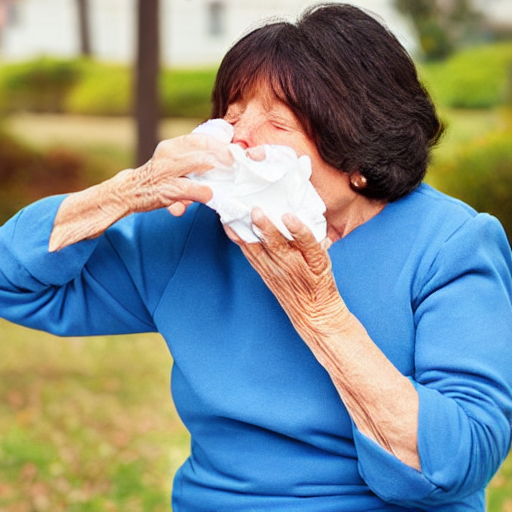

In [21]:
#@title generate the image
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline

model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"


pipe = StableDiffusionPipeline.from_pretrained(model_id, use_auth_token=True)
pipe = pipe.to(device)
with autocast("cuda"):
    image = pipe(prompt, guidance_scale=7.5).images[0]  
    
image.save("{}.png".format(prompt.replace(' ','_')))
image

## if we want to pass a parameter in our text (e.g. a different adjective) to check it's influence, we can use following script:

In [8]:
first_part_of_sentence = "an old lady blowing her " #@param {type:"string"}
#@markdown write the different words with ; between them
var_list_string = "huge; ugly; cute; hairy" #@param {type:"string"}
var_list = var_list_string.split(";") 
last_part_of_sentence = "nose" #@param {type:"string"}

In [13]:
#@title
import os
os.makedirs("compare", exist_ok=True)
for i in var_list:
  prompt = "{} {} {}".format(first_part_of_sentence, i, last_part_of_sentence)
  print("generating {}".format(prompt))
  with autocast("cuda"):
    image = pipe(prompt, guidance_scale=7.5).images[0]  
    
  image.save("compare/{}.png".format(prompt.replace(' ','_')))

generating an old lady blowing her  huge nose


  0%|          | 0/51 [00:00<?, ?it/s]

generating an old lady blowing her   ugly nose


  0%|          | 0/51 [00:00<?, ?it/s]

generating an old lady blowing her   cute nose


  0%|          | 0/51 [00:00<?, ?it/s]

generating an old lady blowing her   hairy nose


  0%|          | 0/51 [00:00<?, ?it/s]

## image to image example

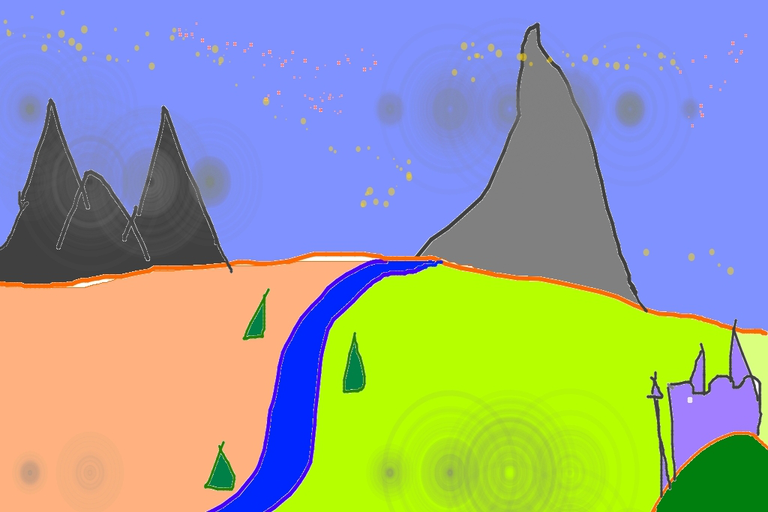

In [22]:
import requests
import torch
from PIL import Image
from io import BytesIO
prompt = "an old lady blowing a whistle, trending on art station" #@param {type:"string"}
start_img_url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg" #@param {type:"string"}

# let's download an initial image
response = requests.get(start_img_url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image = init_image.resize((768, 512))
init_image

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


  0%|          | 0/38 [00:00<?, ?it/s]

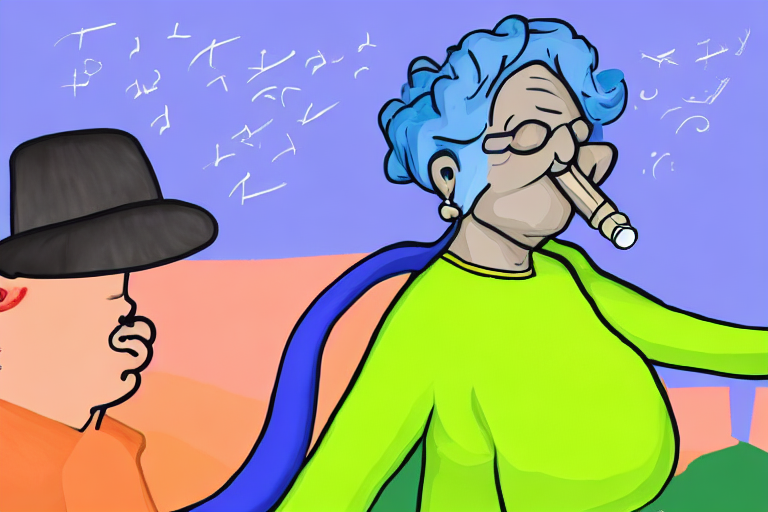

In [24]:
#@title
from diffusers import StableDiffusionImg2ImgPipeline

# load the pipeline
device = "cuda"
model_id_or_path = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    model_id_or_path,
    revision="fp16", 
    torch_dtype=torch.float16,
)
# or download via git clone https://huggingface.co/CompVis/stable-diffusion-v1-4
# and pass `model_id_or_path="./stable-diffusion-v1-4"`.
pipe = pipe.to(device)

images = pipe(prompt=prompt, init_image=init_image, strength=0.75, guidance_scale=7.5).images

images[0].save("{}.png".format(prompt.replace(' ','_')))
images[0]

## fetching the seed and continuing on that one
[link](https://github.com/pcuenca/diffusers-examples/blob/main/notebooks/stable-diffusion-seeds.ipynb)

In [ ]:
#@title enter the prompt:
prompt = "an old lady blowing her nose" #@param {type:"string"}


In [ ]:
#@title generate the image
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline

model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"


pipe = StableDiffusionPipeline.from_pretrained(model_id, use_auth_token=True)
pipe = pipe.to(device)
with autocast("cuda"):
    temp = pipe(prompt, guidance_scale=7.5)
    image = temp.images[0]  
    
# image.save("{}.png".format(prompt.replace(' ','_')))
